In [3]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [17]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features and labels
x_train = train_data.drop('label', axis=1).values  # Assuming 'label' is the column for labels
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [18]:
#to see length of training dataset
len(x_train)

60000

In [19]:
##to see length of testing dataset
len(x_test)

10000

In [20]:
len(y_train)

60000

In [21]:
x_train.shape

(60000, 784)

In [22]:
x_test.shape

(10000, 784)

In [23]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

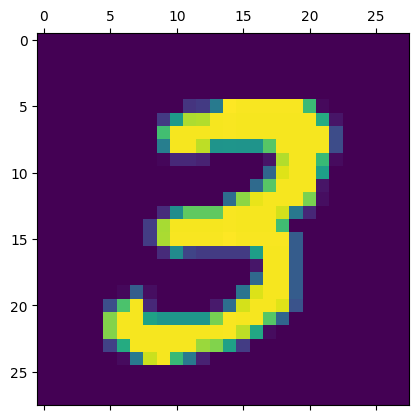

In [28]:
#to see how first image look
 # flattened format (1D array) and, if so, reshapes them back into their original 2D image format (28x28
if x_train.shape[1] == 784:  # Assuming a flattened 28x28 image
    x_train = x_train.reshape(-1, 28, 28)

# Display the 8th image (index 7)
plt.matshow(x_train[7])


In [30]:
#normalize the images by scaling pixel intensities to the range 0,1
# improve model performance, stability, and convergence during training.
x_train = x_train / 255
x_test = x_test / 255

In [31]:
# activation introducing non-linearity,decides when neuron is fired based on nput,helps to lean complex patten
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:

# flatten to compressess and make it 2d to 1d
# dense layer
# output layer 
# softmax return max value out of 10 neurons 10 class probabilities
# relu=>for -ve op is 0 and +ve f(x)=x
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Stochastic Gradient Descent to update model weights.
# loss functio is diff pred and true label
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# epochs=times model is performed on train data
# fit to train model
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9719 - loss: 0.1020 - val_accuracy: 0.9685 - val_loss: 0.1111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.0976 - val_accuracy: 0.9678 - val_loss: 0.1082
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9739 - loss: 0.0946 - val_accuracy: 0.9688 - val_loss: 0.1061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0937 - val_accuracy: 0.9694 - val_loss: 0.1032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0879 - val_accuracy: 0.9698 - val_loss: 0.1015
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0842 - val_accuracy: 0.9706 - val_loss: 0.1009
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0853 - val_accuracy: 0.9705 - val_loss: 0.0978
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0791 - 

In [50]:
# loss and accu calculate
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9676 - loss: 0.1093
Loss=0.095
Accuracy=0.972


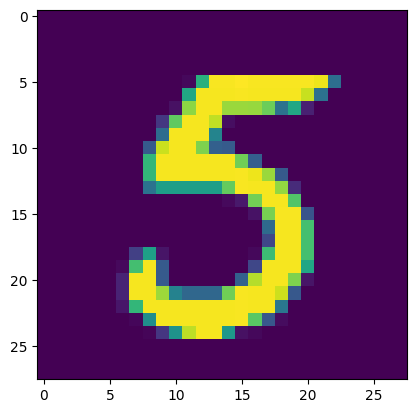

In [51]:
n=random.randint(0,9999)
# accessesing nth image
plt.imshow(x_test[n])
plt.show()

In [52]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Handwritten number in the image is= 5


In [53]:
# history.history is a dictionary that stores the training and validation metrics recorded during training.
history.history??

Type:        dict
String form: {'accuracy': [0.9723166823387146, 0.9732666611671448, 0.974133312702179, 0.9750333428382874, 0.9757166504859924, 0.9763666391372681, 0.977150022983551, 0.9778666496276855, 0.9785500168800354, 0.9794999957084656], 'loss': [0.10068567842245102, 0.09735965728759766, 0.09422224760055542, 0.09132024645805359, 0.08850660920143127, 0.0857994481921196, 0.08316310495138168, 0.08097534626722336, 0.07860109955072403, 0.07652441412210464], 'val_accuracy': [0.968500018119812, 0.9678000211715698, 0.9688000082969666, 0.9693999886512756, 0.9697999954223633, 0.9706000089645386, 0.9704999923706055, 0.9704999923706055, 0.9710999727249146, 0.9715999960899353], 'val_loss': [0.11110588163137436, 0.10822038352489471, 0.10606561601161957, 0.10324938595294952, 0.10154101997613907, 0.10086438059806824, 0.09780703485012054, 0.09748785942792892, 0.09556619077920914, 0.09522715210914612]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initi

In [54]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

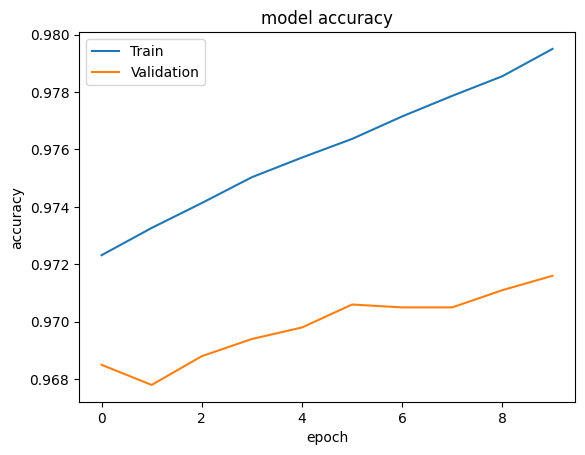

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

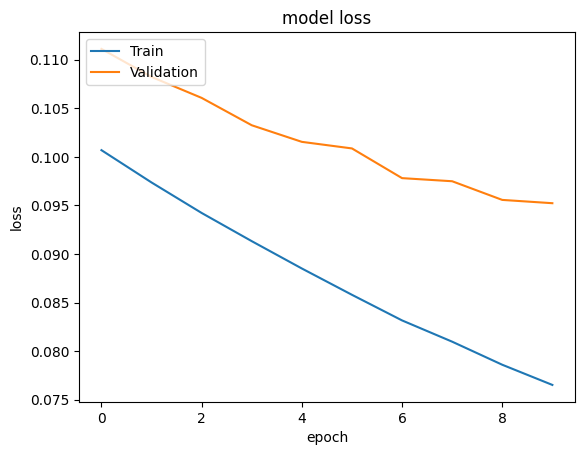

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

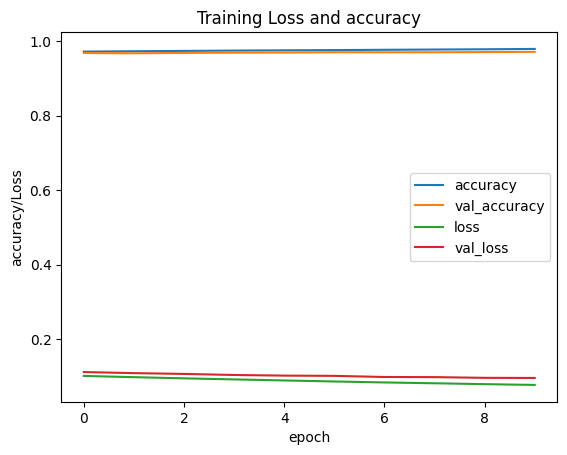

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()
